In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape
y_train
X_test
y_test

Label:  5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

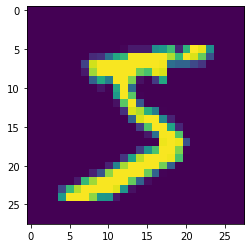

Label:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

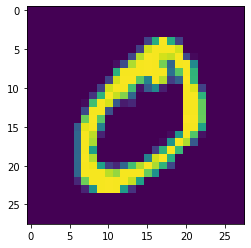

Label:  4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

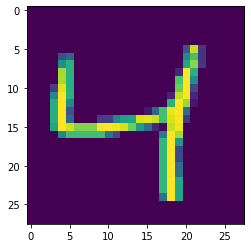

Label:  1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

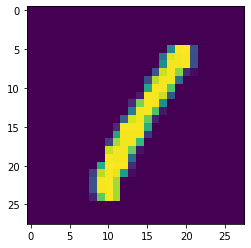

Label:  9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

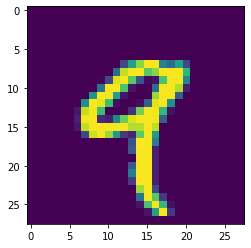

In [8]:
for i in range(5):
    print('Label: ', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

In [10]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
logr = LogisticRegression(random_state=0)

In [18]:
logr.fit(X_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
first = np.random.choice(1000,1000)
second = np.random.choice(1000,1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
df = pd.DataFrame(data=first, columns=['first'])
df['second'] = second
df['weights'] = .01
df['bias'] = 500

<IPython.core.display.Javascript object>

In [21]:
df['sums'] = df['first'] + df['second']

In [22]:
df

,first,second,weights,bias,sums
0,516,958,0.01,500,1474
1,775,114,0.01,500,889
2,307,861,0.01,500,1168
3,935,57,0.01,500,992
4,512,806,0.01,500,1318
...,...,...,...,...,...
995,217,742,0.01,500,959
996,961,276,0.01,500,1237
997,991,711,0.01,500,1702
998,187,955,0.01,500,1142


In [23]:
X_train = df[['first', 'second']][:800]

In [24]:
y_train = df['sums'][:800]

In [25]:
y_train

0      1474
1       889
2      1168
3       992
4      1318
       ... 
795     902
796    1340
797     430
798    1175
799    1162
Name: sums, Length: 800, dtype: int64

In [51]:
def prepare(ind):
    # return int1, int2, wt, bias
    return df.iloc[ind].drop('sums').values

# int1, int2, wt, bias = prepare(0)

def forward(i1, i2, w, b):
    final = w*(i1 + i2) + b
    return final

# fv = forward(samp)
# fv

# rs = df.iloc[0].sums
# rs

def loss(forward_value, real_sum, weight):
    ratio = (real_sum - forward_value)/real_sum
    if forward_value < real_sum:
        # make weight larger
        return weight/ratio*-1
    if forward_value > real_sum:
        # make weight smaller 
        return weight*ratio
    if forward_value == real_sum:
        return weight

In [52]:
def epochs(how_many, index):
    curr = 1
    for i in range(how_many):
        int1, int2, wt, bias = prepare(index)
        fv = forward(int1, int2, wt, bias)
        rs = df.iloc[index].sums
        wt = loss(fv, rs, wt)
        df['weights'][index] = wt
        print('epoch: ', curr)
        print('new weight: ', wt)
        print('new guess: ', fv)
        print('real sum: ', rs)
        curr += 1

In [54]:
epochs(100, 0)

epoch:  1
new weight:  0.8846311054240864
new guess:  -6968.483596469761
real sum:  1474.0
epoch:  2
new weight:  -0.1980194812299333
new guess:  1803.9462493951035
real sum:  1474.0
epoch:  3
new weight:  0.2305752128123369
new guess:  208.11928466707832
real sum:  1474.0
epoch:  4
new weight:  -0.5359574830264778
new guess:  839.8678636853846
real sum:  1474.0
epoch:  5
new weight:  0.4478462212891442
new guess:  -290.00132998102833
real sum:  1474.0
epoch:  6
new weight:  -2.103149421261623
new guess:  1160.1253301801985
real sum:  1474.0
epoch:  7
new weight:  0.760925405049087
new guess:  -2600.0422469396326
real sum:  1474.0
epoch:  8
new weight:  -0.07619787603974758
new guess:  1621.6040470423543
real sum:  1474.0
epoch:  9
new weight:  0.10339137366651645
new guess:  387.6843307174121
real sum:  1474.0
epoch:  10
new weight:  -0.1854901143171671
new guess:  652.3988847844453
real sum:  1474.0
epoch:  11
new weight:  0.21918366552713583
new guess:  226.58757149649568
real sum: 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
